In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
dataset = pd.read_csv('/Users/karimitani/nyc-rolling-sales.csv')
dataset.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# removing unnecessary columns 
dataset.drop(['Unnamed: 0','ADDRESS','EASE-MENT','APARTMENT NUMBER','SALE DATE','NEIGHBORHOOD','BUILDING CLASS AT PRESENT','BUILDING CLASS AT TIME OF SALE'],inplace=True, axis=1)
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633,6440,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616,18690,1900,2,-
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212,7803,1900,2,-
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272,6794,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369,4615,1900,2,8000000


In [4]:
# dropping duplicate values 
dataset.drop_duplicates(keep=False, inplace = True)
dataset.duplicated(keep=False).sum()

0

In [5]:
# convert the varaible to different types
dataset['TAX CLASS AT PRESENT'] = dataset['TAX CLASS AT PRESENT'].astype('category')
dataset['LAND SQUARE FEET'] = pd.to_numeric(dataset['LAND SQUARE FEET'], errors='coerce')
dataset['GROSS SQUARE FEET'] = pd.to_numeric(dataset['GROSS SQUARE FEET'], errors='coerce')
dataset['SALE PRICE'] = pd.to_numeric(dataset['SALE PRICE'], errors='coerce')

In [6]:
# replace null value with mean values
dataset['LAND SQUARE FEET'] = dataset['LAND SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['GROSS SQUARE FEET'] = dataset['GROSS SQUARE FEET'].fillna(dataset['LAND SQUARE FEET'].mean())
dataset['SALE PRICE'] = dataset['SALE PRICE'].fillna(dataset['SALE PRICE'].mean())
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,5,0,5,1633.0,6440.0,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,28,3,31,4616.0,18690.0,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,16,1,17,2212.0,7803.0,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,10,0,10,2272.0,6794.0,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,6,0,6,2369.0,4615.0,1900,2,8.000000e+06


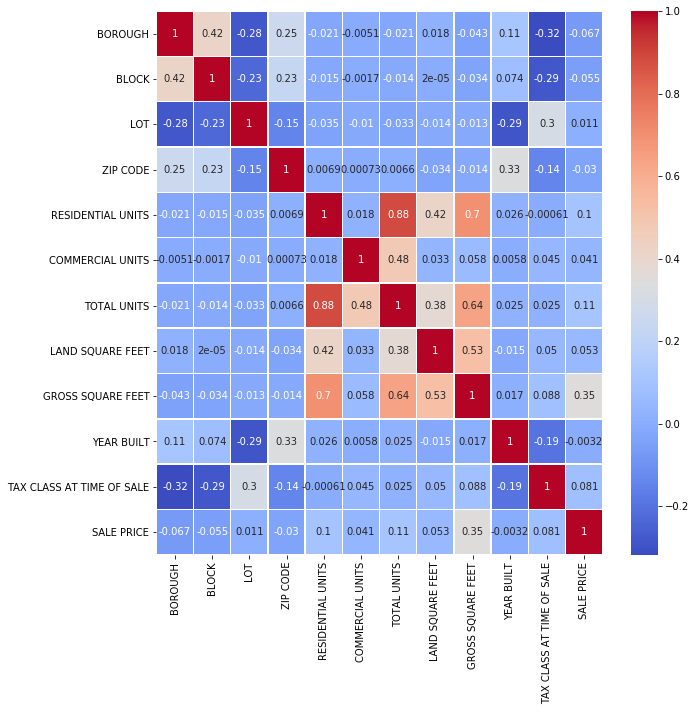

In [7]:
# Create correlation matrix 
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="coolwarm", annot=True, linewidths=.5, ax = ax)

In [8]:
# removing highly correlated indepdent varaible from the dataset
dataset.drop(['RESIDENTIAL UNITS','GROSS SQUARE FEET',],inplace=True, axis=1)
dataset.head()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,2A,392,6,10009,0,5,1633.0,1900,2,6.625000e+06
1,1,07 RENTALS - WALKUP APARTMENTS,2,399,26,10009,3,31,4616.0,1900,2,1.318088e+06
2,1,07 RENTALS - WALKUP APARTMENTS,2,399,39,10009,1,17,2212.0,1900,2,1.318088e+06
3,1,07 RENTALS - WALKUP APARTMENTS,2B,402,21,10009,0,10,2272.0,1913,2,3.936272e+06
4,1,07 RENTALS - WALKUP APARTMENTS,2A,404,55,10009,0,6,2369.0,1900,2,8.000000e+06


In [9]:
#Select variables to be one-hot encoded
one_hot_features = ['BOROUGH', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT','TAX CLASS AT TIME OF SALE']
one_hot_features

['BOROUGH',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'TAX CLASS AT TIME OF SALE']

In [10]:
# Convert categorical variables into indicator variables 
one_hot_encoded = pd.get_dummies(dataset[one_hot_features])

In [11]:
# Descriptive statistics for each category
numeric_data=dataset.select_dtypes(include=[np.number])
numeric_data.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,79420.000000,7.942000e+04,79420.000000,79420.000000,7.942000e+04
mean,3.003072,4247.948892,384.243881,10728.378406,0.178356,2.207328,3.834115e+03,1788.115487,1.642067,1.318088e+06
std,1.289991,3572.671258,664.900517,1302.622168,8.623468,18.388689,3.514948e+04,539.215899,0.814103,1.069362e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2.000000,1327.000000,22.000000,10305.000000,0.000000,1.000000,2.000000e+03,1920.000000,1.000000,3.150000e+05
50%,3.000000,3328.000000,51.000000,11209.000000,0.000000,1.000000,3.107500e+03,1939.000000,1.000000,6.700000e+05
75%,4.000000,6258.000000,1002.000000,11357.000000,0.000000,2.000000,3.834115e+03,1966.000000,2.000000,1.318088e+06
max,5.000000,16322.000000,9106.000000,11694.000000,2261.000000,2261.000000,4.252327e+06,2017.000000,4.000000,2.210000e+09


In [12]:
x_dataset = dataset
y_dataset = dataset
df = dataset

In [13]:
# Sales price remains the same
df.drop(one_hot_features,axis=1,inplace=True)
df = pd.concat([df, one_hot_encoded] ,axis=1)

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_data.columns])
df.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,392,6,10009,0,5,1633.0,1900,6.625000e+06,1,2,...,0,0,0,0,0,1,0,0,0,0
1,399,26,10009,3,31,4616.0,1900,1.318088e+06,1,2,...,0,0,0,0,1,0,0,0,0,0
2,399,39,10009,1,17,2212.0,1900,1.318088e+06,1,2,...,0,0,0,0,1,0,0,0,0,0
3,402,21,10009,0,10,2272.0,1913,3.936272e+06,1,2,...,0,0,0,0,0,0,1,0,0,0
4,404,55,10009,0,6,2369.0,1900,8.000000e+06,1,2,...,0,0,0,0,0,1,0,0,0,0


In [15]:
scaled = scaler.transform(df[numeric_data.columns])
for i, col in enumerate(numeric_data.columns):
       df[col] = scaled[:,i]
df.head()

,BLOCK,LOT,ZIP CODE,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH,TAX CLASS AT TIME OF SALE,...,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4
0,0.023957,0.000549,0.855909,0.000000,0.002211,0.000384,0.941993,0.002998,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,0
1,0.024386,0.002746,0.855909,0.001327,0.013711,0.001086,0.941993,0.000596,0.0,0.333333,...,0,0,0,0,1,0,0,0,0,0
2,0.024386,0.004174,0.855909,0.000442,0.007519,0.000520,0.941993,0.000596,0.0,0.333333,...,0,0,0,0,1,0,0,0,0,0
3,0.024570,0.002197,0.855909,0.000000,0.004423,0.000534,0.948438,0.001781,0.0,0.333333,...,0,0,0,0,0,0,1,0,0,0
4,0.024692,0.005931,0.855909,0.000000,0.002654,0.000557,0.941993,0.003620,0.0,0.333333,...,0,0,0,0,0,1,0,0,0,0


In [16]:
# Testing inverse transform
scaled_twice = scaler.inverse_transform(scaled)
scaled_twice_df = pd.DataFrame(list(scaled_twice))
scaled_twice_df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,392.0,6.0,10009.0,0.0,5.0,1633.0,1900.0,2.0,6.625000e+06
1,1.0,399.0,26.0,10009.0,3.0,31.0,4616.0,1900.0,2.0,1.318088e+06
2,1.0,399.0,39.0,10009.0,1.0,17.0,2212.0,1900.0,2.0,1.318088e+06
3,1.0,402.0,21.0,10009.0,0.0,10.0,2272.0,1913.0,2.0,3.936272e+06
4,1.0,404.0,55.0,10009.0,0.0,6.0,2369.0,1900.0,2.0,8.000000e+06


In [17]:
# classifying data into independent and dependent variable
X = df.drop(['SALE PRICE'],axis = 1).values
y = df['SALE PRICE'].values

In [18]:
# creating test and training set data
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
y_test_df = pd.DataFrame(list(y_test))
y_test_df.head()

,0
0,0.000351
1,0.000596
2,0.000373
3,0.000229
4,0.000265


In [20]:
# fitting linear regression to training set
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
# calulating RMSE value
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.0037968771447404017

In [22]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred_rf))
rmse

0.0035225338733285445

In [23]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
# Importing the libraries
import keras
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [25]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(67, input_dim=67, kernel_initializer='normal', activation='relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(output_dim = 67, init = 'uniform', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# Fitting to the training set
estimator = KerasRegressor(build_fn=baseline_model, epochs=150, batch_size=10, verbose=False)
estimator.fit(X_train, y_train)
# Predicting the results
prediction = estimator.predict(X_test)

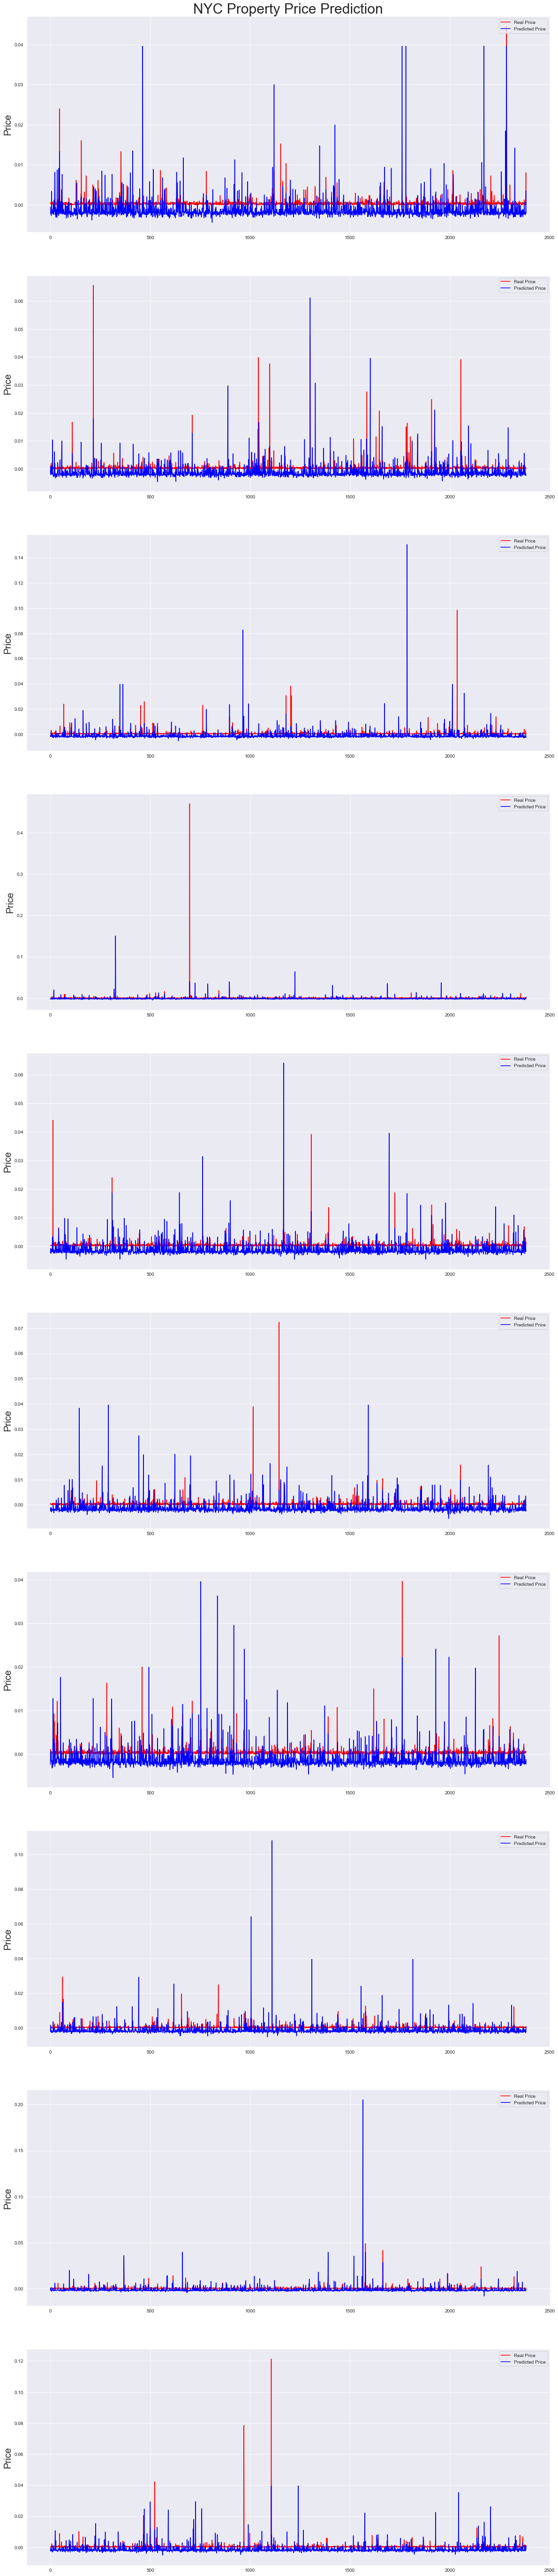

In [26]:
# Visualization the results 
n = 10
length = len(prediction)
sns.set_style('darkgrid', {'axis.facecolor':'black'})
f, axes = plt.subplots(n, 1, figsize=(20,100))
times = 0
for i in range(n):
    if i == 0:
        plt.sca(axes[0])
        plt.plot(y_test[:round(length/n)], color = 'red', label = 'Real Price')
        plt.plot(prediction[:round(length/n)], color = 'blue', label = 'Predicted Price')
        plt.title('NYC Property Price Prediction', fontsize=30)
        plt.ylabel('Price', fontsize=20)
        plt.legend(loc=1, prop={'size': 10})
    else:
        if i == n-1:
            plt.sca(axes[n-1])
            plt.plot(y_test[round(length/n*(n-1)):], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*(n-1)):], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
        else:
            plt.sca(axes[i])
            plt.plot(y_test[round(length/n*i):round(length/n*(i+1))], color = 'red', label = 'Real Price')
            plt.plot(prediction[round(length/n*i):round(length/n*(i+1))], color = 'blue', label = 'Predicted Price')
            plt.ylabel('Price', fontsize=20)
            plt.legend(loc=1, prop={'size': 10})
plt.show()

In [27]:
prediction

array([-0.00053111, -0.00209308, -0.00194964, ..., -0.00186371,
       -0.00207859,  0.00119513], dtype=float32)

In [28]:
my_listt = y_test
my_new_listt = [i * 18896177980.60467769537935 for i in my_listt]

In [29]:
my_new_listt_df = pd.DataFrame(list(my_new_listt))
my_new_listt_df.head()

,0
0,6.626488e+06
1,1.127006e+07
2,7.054003e+06
3,4.317905e+06
4,5.006145e+06


In [30]:
my_new_listt_df.to_csv('y_test.csv')
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [31]:
prediction

array([-0.00053111, -0.00209308, -0.00194964, ..., -0.00186371,
       -0.00207859,  0.00119513], dtype=float32)

In [32]:
predicted_listt = prediction
my_new_predicted_listt = [i * 18896177980.60467769537935 for i in predicted_listt]

In [33]:
my_new_predicted_listt
my_new_predicted_listtt = pd.DataFrame(list(my_new_predicted_listt))
my_new_predicted_listtt.head()

,0
0,-1.003604e+07
1,-3.955122e+07
2,-3.684071e+07
3,-4.714410e+07
4,-4.614472e+07


In [34]:
my_new_predicted_listtt.to_csv('predicted_testtt.csv')
y_test_df

,0
0,3.506787e-04
1,5.964199e-04
2,3.733032e-04
3,2.285068e-04
4,2.649290e-04
...,...
23821,1.515837e-03
23822,0.000000e+00
23823,9.049774e-07
23824,3.846154e-04


In [35]:
predicted_df = pd.DataFrame(list(prediction))
predicted_df.head()

,0
0,-0.000531
1,-0.002093
2,-0.001950
3,-0.002495
4,-0.002442


In [36]:
predicted_df = predicted_df.rename({'0': 'Prediction'})
predicted_df.head()

,0
0,-0.000531
1,-0.002093
2,-0.001950
3,-0.002495
4,-0.002442


In [37]:
predicted_df.rename(columns={"0": "prediction"}, inplace=True)
predicted_df.head()

,0
0,-0.000531
1,-0.002093
2,-0.001950
3,-0.002495
4,-0.002442


In [38]:
predicted_df.rename(index={0: "prediction"}).head()

,0
prediction,-0.000531
1,-0.002093
2,-0.001950
3,-0.002495
4,-0.002442


In [39]:
y_test
y_test_df = pd.DataFrame(list(y_test))
y_test_df.head()

,0
0,0.000351
1,0.000596
2,0.000373
3,0.000229
4,0.000265


In [40]:
resultedd = predicted_df.append(y_test_df, ignore_index=True, sort=False)
resultedd.head()

,0
0,-0.000531
1,-0.002093
2,-0.001950
3,-0.002495
4,-0.002442


In [42]:
frames = [predicted_df, y_test_df]
combined_ys = pd.append(frames, sort=False)
combined_ys.head()

AttributeError: module 'pandas' has no attribute 'append'

In [43]:
import numpy as np
prediction_reshaped = prediction.reshape(-1, 1)
prediction_reshaped

array([[-0.00053111],
       [-0.00209308],
       [-0.00194964],
       ...,
       [-0.00186371],
       [-0.00207859],
       [ 0.00119513]], dtype=float32)

In [44]:
prediction_inverse = scaler.inverse_transform(prediction_reshaped)

ValueError: non-broadcastable output operand with shape (23826,1) doesn't match the broadcast shape (23826,10)

In [45]:
prediction

array([-0.00053111, -0.00209308, -0.00194964, ..., -0.00186371,
       -0.00207859,  0.00119513], dtype=float32)

In [46]:
y_test

array([3.50678733e-04, 5.96419892e-04, 3.73303167e-04, ...,
       9.04977376e-07, 3.84615385e-04, 5.96419892e-04])

In [47]:
combined_arrays = np.vstack((prediction, y_test)).T
combined_arrays

array([[-5.31114638e-04,  3.50678733e-04],
       [-2.09308043e-03,  5.96419892e-04],
       [-1.94963813e-03,  3.73303167e-04],
       ...,
       [-1.86370686e-03,  9.04977376e-07],
       [-2.07858905e-03,  3.84615385e-04],
       [ 1.19512528e-03,  5.96419892e-04]])